In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualize

In [74]:
from config import config
import os
os.chdir(config.paths.roots.project)

In [75]:
from pipeline import Painter
painter = Painter()

In [76]:
names = painter.data_store.get_random_pair()
name_a, name_b = names.split('_')

name_a, name_b

('8657552377790', '8657585651890')

In [77]:
# name_a = config.samples[config.task.name].reference
# name_b = config.samples[config.task.name].target
# 
# name_a, name_b

# Keypoints

INFO     | show_keypoints | Number of Keypoints 300


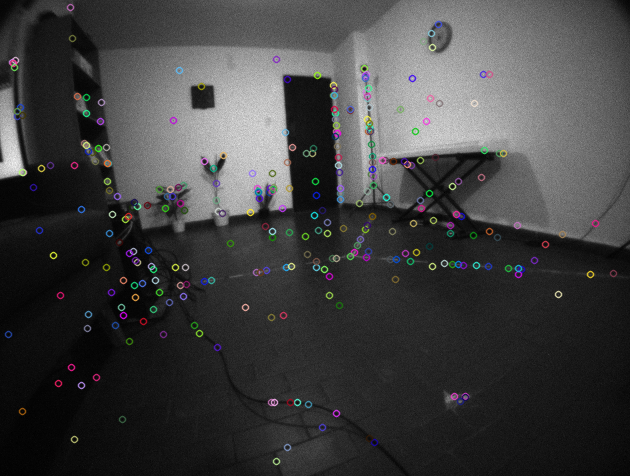

In [78]:
painter.show_keypoints(name_a, filtered=False)

INFO     | show_keypoints | Number of Keypoints 100


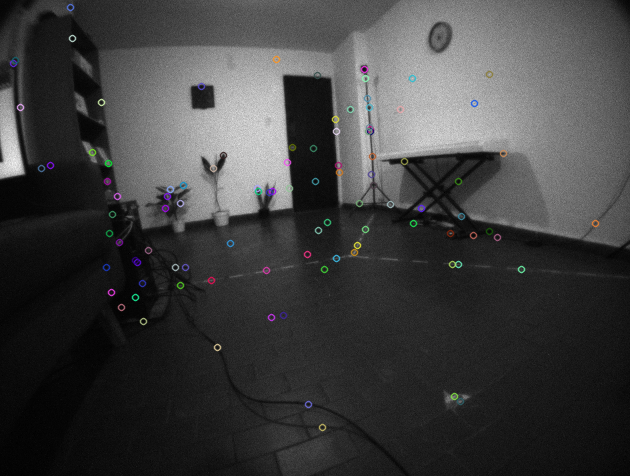

In [79]:
painter.show_keypoints(name_a, filtered=True)

# Matches

INFO     | show_matches | Number of Matches 228


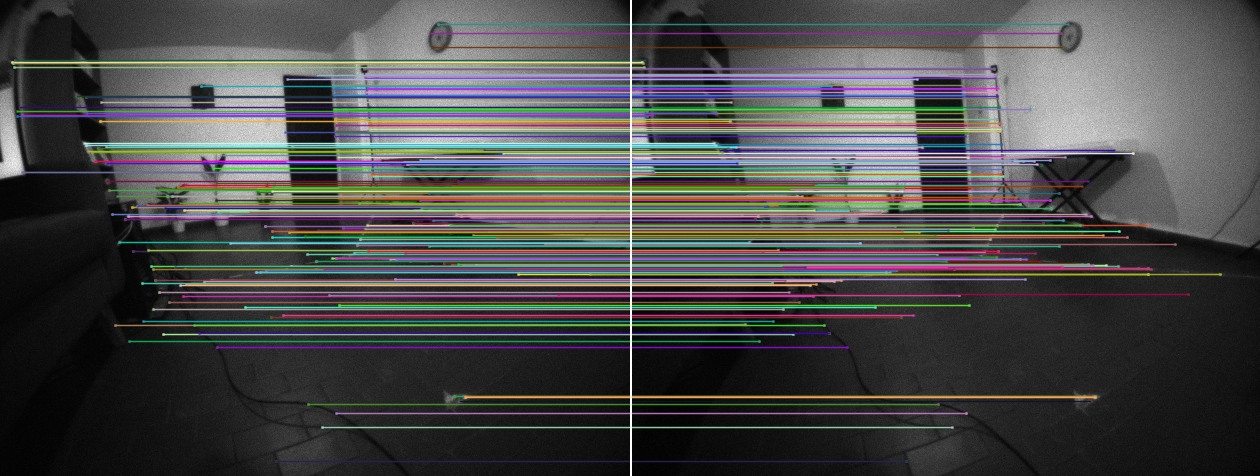

In [80]:
painter.show_matches(name_a, name_b) 

# Filtered Matches

INFO     | show_filtered_matches | Number of Matches 80


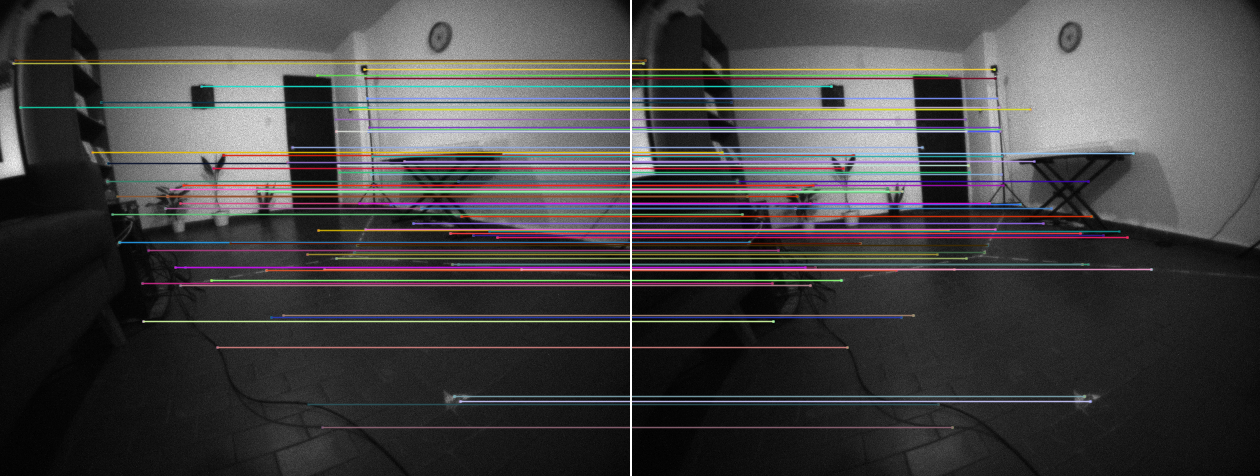

In [81]:
painter.show_filtered_matches(name_a, name_b)

INFO     | show_matches_on_original_image | Number of Matches 80


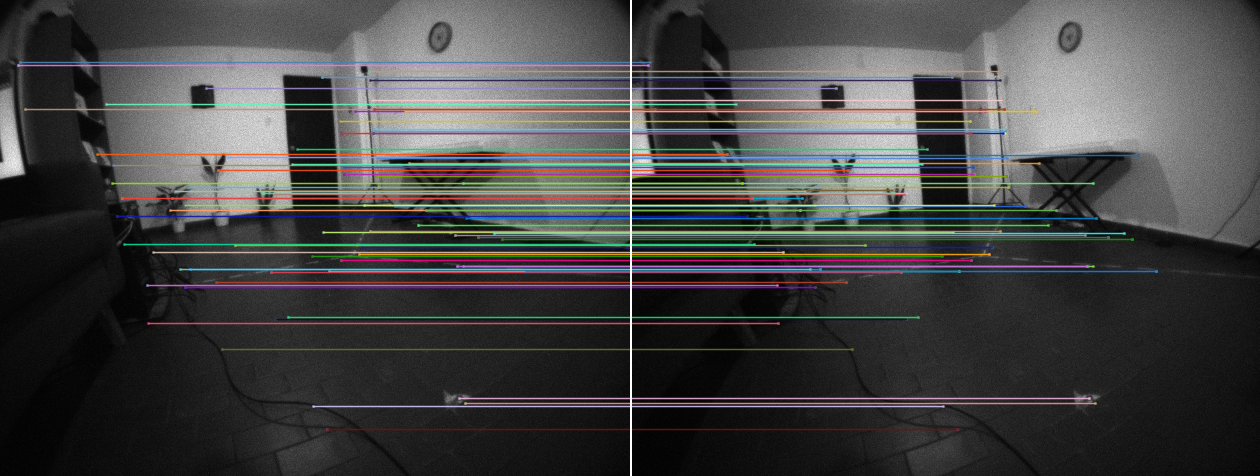

In [82]:
painter.show_matches_on_original_image(name_a, name_b)

In [83]:
painter.data_store.close()